## Creating an analytical and modelling framework to predict the customer
## Churn: 1 (Yes) / 0 (No)

## LOADING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import decomposition
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,roc_auc_score,roc_curve

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Reading the data

In [2]:
churn_data_train = pd.read_excel("train_data-1578037482430.xlsx",header=0,na_values=['unknown'])
churn_data_test = pd.read_excel("test_data-1578037501169.xlsx",header=0,na_values=['unknown'])

## EXPLORATORY DATA ANALYSIS

### Displaying first 5 rows from train data

In [3]:
churn_data_train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


### Displaying first 5 rows from test data

In [4]:
churn_data_test.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,NaN,single,management,yes,624,0.00,2,1,1,62825.03
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70


### Getting a summary/description of the tain data

In [5]:
churn_data_train.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360,7360,...,7360,6579,7169,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
unique,7360,7360,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,3,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C8064287,Name_7317104,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,...,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3994,3693,...,2559,3207,3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,NaN,NaN,...,NaN,NaN,NaN,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,NaN,NaN,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,NaN,NaN,...,NaN,NaN,NaN,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,NaN,NaN,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,NaN,NaN,...,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,...,NaN,NaN,NaN,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,NaN,NaN,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,NaN,NaN,...,NaN,NaN,NaN,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000


### Getting a summary/description of the test data

In [6]:
churn_data_test.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
count,1840,1840,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840,1840,1359,1840,1663,1781,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
unique,1840,1840,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3,3,6,2,NaN,NaN,NaN,NaN,NaN,NaN
top,C4939593,Name_2507838,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,992,910,472,684,805,944,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1979.079348,6.428261,14.646739,2013.067391,6.496739,14.621196,NaN,NaN,NaN,NaN,NaN,NaN,650.783152,75116.590674,1.554348,0.707609,0.531522,100166.398853
std,NaN,NaN,10.722776,3.446675,8.205039,2.877756,3.468336,8.081591,NaN,NaN,NaN,NaN,NaN,NaN,96.329207,62614.929825,0.602950,0.454985,0.499141,58071.421408
min,NaN,NaN,1937.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,363.000000,0.000000,1.000000,0.000000,0.000000,106.670000
25%,NaN,NaN,1974.000000,4.000000,7.750000,2011.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,50050.127500
50%,NaN,NaN,1981.000000,6.000000,15.000000,2013.000000,7.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,651.000000,97372.095000,2.000000,1.000000,1.000000,100766.915000
75%,NaN,NaN,1986.000000,9.000000,22.000000,2016.000000,9.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,718.000000,127735.702500,2.000000,1.000000,1.000000,149760.675000


### Displaying the Columns of the Train data

In [7]:
print(list(churn_data_train.columns))

['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth', 'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn']


### Displaying the Columns of the Test data

In [8]:
print(list(churn_data_test.columns))

['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth', 'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse', 'CreditScore', 'AccountBalance', 'NumberOfProducts', 'IsCreditCardCustomer', 'ActiveMember', 'Salary']


### Shape of Train and Test Data

In [9]:
print("Shape of train data is",churn_data_train.shape)
print("Shape of test data is",churn_data_test.shape)

Shape of train data is (7360, 21)
Shape of test data is (1840, 20)


### DataTypes of the train data

In [10]:
churn_data_train.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

In [11]:
churn_data_test.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
dtype: object


## Finding the distribution of Churn in the Train data

0    5868
1    1492
Name: Churn, dtype: int64
Percentage of people churned: 20.27173913043478 %


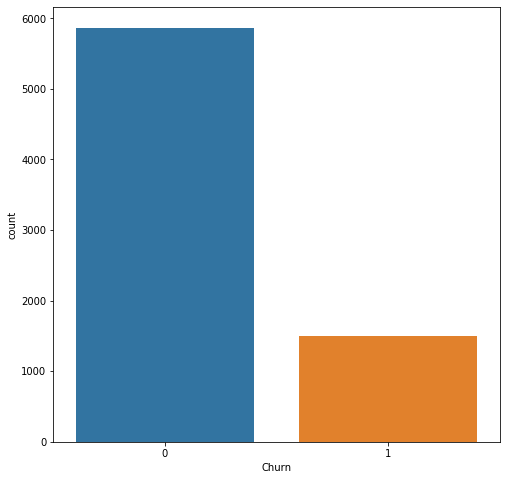

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',data=churn_data_train)
plt.savefig('Distribution.jpeg')


# Finding the counts of churn
print(churn_data_train.Churn.value_counts())

# What is the percentage of churn?
count_yes = len(churn_data_train[churn_data_train.Churn == 1])
count_no = len(churn_data_train[churn_data_train.Churn != 1])

percentage = (count_yes/(count_yes + count_no))*100

print('Percentage of people churned:', percentage, "%")

## Finding the distribution based on Gender

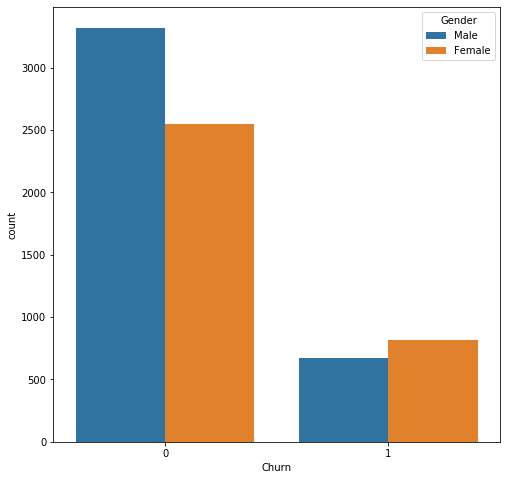

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',hue='Gender',data=churn_data_train)
plt.show()
plt.savefig('GenderVsChurn.png')

### FINDING DISTRIBUTION BASED ON EDUCATION

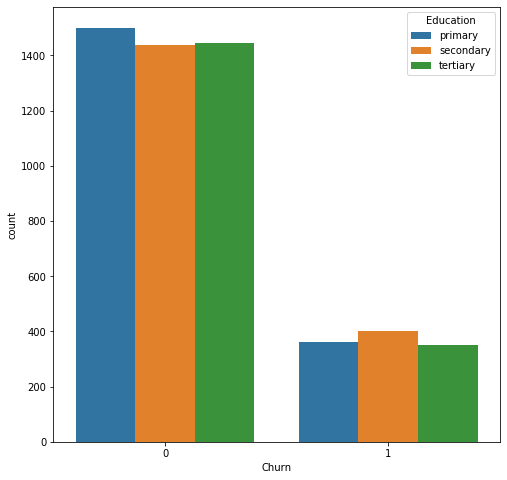

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',hue='Education',data=churn_data_train)
plt.show()
plt.savefig('EducationVsChurn.png')

## FINDING THE DISTRIBUTION BASED ON LOCATION

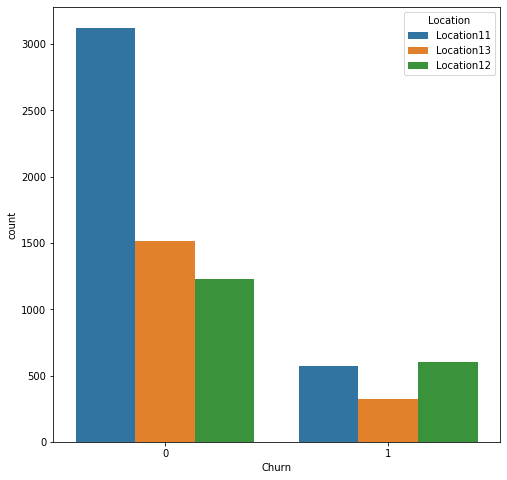

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',hue='Location',data=churn_data_train)
plt.show()
plt.savefig('LocationVsChurn.png')

## Finding Distribution based on Marital Status

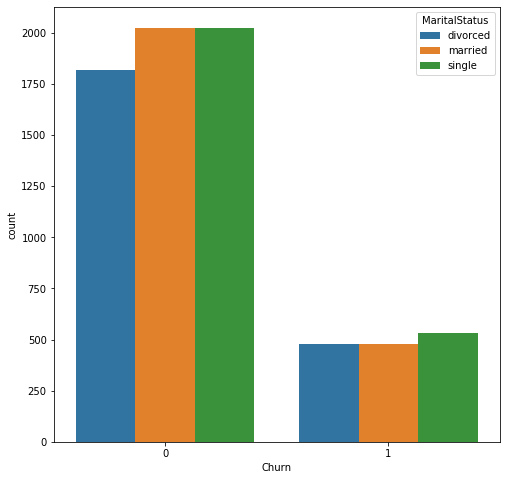

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',hue='MaritalStatus',data=churn_data_train)
plt.show()
plt.savefig('MaritalVsChurn.png')


## Finding Distribution based on Occupation

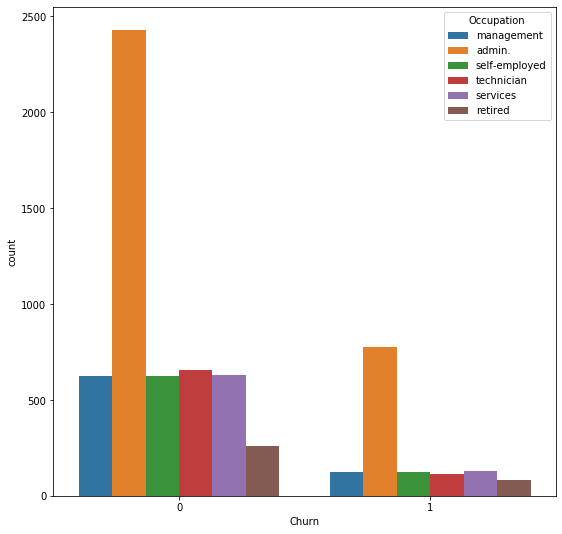

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(9,9))
sns.countplot(x='Churn',hue='Occupation',data=churn_data_train)
plt.show()
plt.savefig('OccVsChurn.png')

### DETECTING OUTLIERS BASED ON CREDIT SCORE

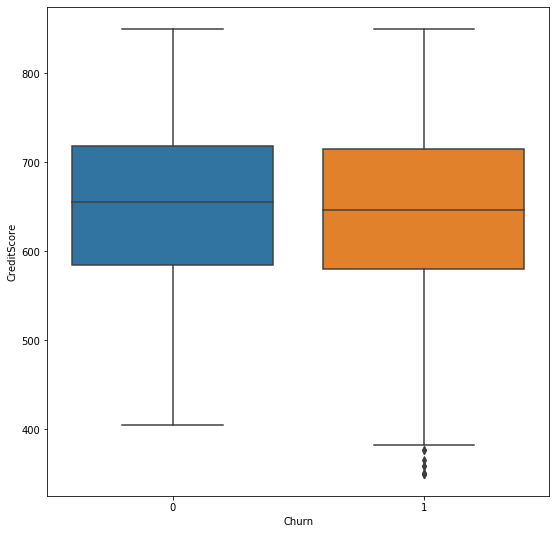

In [18]:
plt.figure(figsize=(9,9))
sns.boxplot(x="Churn", y="CreditScore", data=churn_data_train)
plt.savefig('CreditOutliers.jpeg')

## Detecting Outliers based on Account Balance

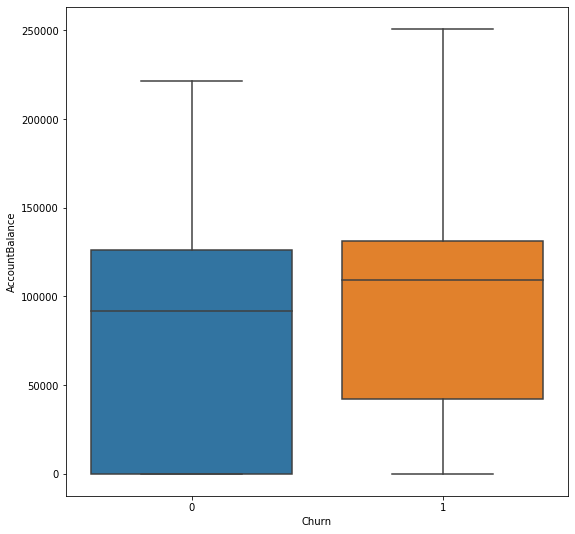

In [19]:
plt.figure(figsize=(9,9))
sns.boxplot(x="Churn", y="AccountBalance", data=churn_data_train)
plt.savefig('AccBalOutliers.jpeg')

## Detecting Outliers based on Salary

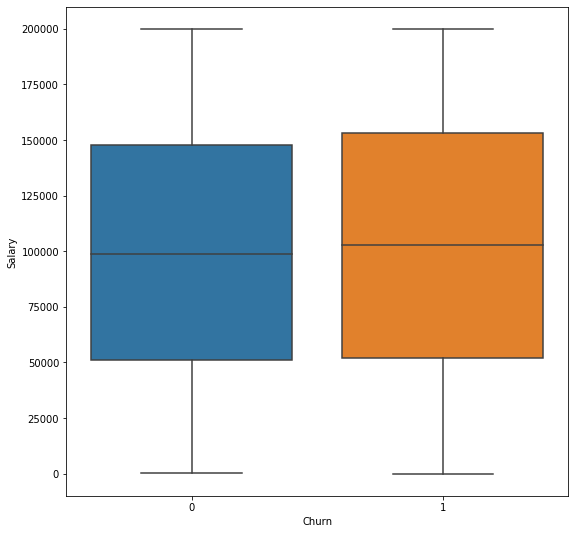

In [20]:
plt.figure(figsize=(9,9))
sns.boxplot(x="Churn", y="Salary", data=churn_data_train)
plt.savefig('SalOutliers.jpeg')

## FEATURE ENGINEERING

In [21]:
churn_data_train.drop('CustomerID',axis=1,inplace=True)
churn_data_train.drop('CustomerName',axis=1,inplace=True)
churn_data_train.drop('yearofBirth',axis=1,inplace=True)
churn_data_train.drop('monthofBirth',axis=1,inplace=True)
churn_data_train.drop('dayofBirth',axis=1,inplace=True)
churn_data_train.drop('dayofEntry',axis=1,inplace=True)
churn_data_train.drop('monthofEntry',axis=1,inplace=True)


In [22]:
print("Number of columns:",churn_data_train.shape[1])

Number of columns: 14


### TypeCasting

### TypeCasting columns on Train data

In [23]:
col = churn_data_train[churn_data_train.select_dtypes('object').columns]

for c in col:
    churn_data_train[c]=churn_data_train[c].astype('category')

In [24]:
churn_data_train['NumberOfProducts']=churn_data_train['NumberOfProducts'].astype('category')
churn_data_train['IsCreditCardCustomer']=churn_data_train['IsCreditCardCustomer'].astype('category')
churn_data_train['ActiveMember']=churn_data_train['ActiveMember'].astype('category')
churn_data_train['yearofEntry']=churn_data_train['yearofEntry'].astype('category')
churn_data_train['Churn']=churn_data_train['Churn'].astype('category')

In [25]:
churn_data_train.dtypes

yearofEntry             category
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts        category
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
dtype: object

### TypeCasting columns on Test Data

In [26]:
col = churn_data_test[churn_data_test.select_dtypes('object').columns]

for c in col:
    churn_data_test[c]=churn_data_test[c].astype('category')

In [27]:
churn_data_test['NumberOfProducts']=churn_data_test['NumberOfProducts'].astype('category')
churn_data_test['IsCreditCardCustomer']=churn_data_test['IsCreditCardCustomer'].astype('category')
churn_data_test['ActiveMember']=churn_data_test['ActiveMember'].astype('category')
churn_data_test['yearofEntry']=churn_data_test['yearofEntry'].astype('category')


In [28]:
churn_data_test.dtypes

CustomerID              category
CustomerName            category
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry             category
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts        category
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
dtype: object

In [29]:
test_custId = churn_data_test['CustomerID']

In [30]:
test_custId.head()

0    C5993228
1    C6546925
2    C7491750
3    C8462011
4    C3187447
Name: CustomerID, dtype: category
Categories (1840, object): [C2001443, C2003319, C2004181, C2006361, ..., C8993145, C8993460, C8999043, C8999901]

In [31]:
churn_data_test.drop('CustomerID',axis=1,inplace=True)
churn_data_test.drop('CustomerName',axis=1,inplace=True)
churn_data_test.drop('yearofBirth',axis=1,inplace=True)
churn_data_test.drop('monthofBirth',axis=1,inplace=True)
churn_data_test.drop('dayofBirth',axis=1,inplace=True)
churn_data_test.drop('dayofEntry',axis=1,inplace=True)
churn_data_test.drop('monthofEntry',axis=1,inplace=True)

In [32]:
print("Number of columns:",churn_data_test.shape[1])

Number of columns: 13


## Treating NA Values

In [33]:
churn_data_train.isna().sum()

yearofEntry                0
Gender                     0
Location                   0
Education               1860
MaritalStatus              0
Occupation               781
Ownhouse                 191
CreditScore                0
AccountBalance             0
NumberOfProducts           0
IsCreditCardCustomer       0
ActiveMember               0
Salary                     0
Churn                      0
dtype: int64

In [34]:
churn_data_test.isna().sum()

yearofEntry               0
Gender                    0
Location                  0
Education               481
MaritalStatus             0
Occupation              177
Ownhouse                 59
CreditScore               0
AccountBalance            0
NumberOfProducts          0
IsCreditCardCustomer      0
ActiveMember              0
Salary                    0
dtype: int64

## Splitting Numeric and Categorical Features

In [35]:
categorical_att = list(churn_data_train.select_dtypes("category").columns)
numeric_att = list(churn_data_train.columns.difference(categorical_att))
categorical_att.pop()

'Churn'

In [36]:
categorical_att

['yearofEntry',
 'Gender',
 'Location',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Ownhouse',
 'NumberOfProducts',
 'IsCreditCardCustomer',
 'ActiveMember']

In [37]:
numeric_att

['AccountBalance', 'CreditScore', 'Salary']

## Train-Test Split

In [38]:
Train, Validation = train_test_split(churn_data_train,test_size=0.3)


feature_train,target_train = Train.loc[:,Train.columns!='Churn'], Train.loc[:,'Churn']

feature_test,target_test = Validation.loc[:,Validation.columns!='Churn'], Validation.loc[:,'Churn']

In [39]:
feature_train.shape

(5152, 13)

In [40]:
feature_test.shape

(2208, 13)

In [41]:
target_train.shape

(5152,)

In [42]:
target_test.shape

(2208,)

In [43]:
target_train

1153    0
6767    0
2798    1
4500    1
1365    0
       ..
6827    0
1837    1
4583    0
136     1
1590    0
Name: Churn, Length: 5152, dtype: category
Categories (2, int64): [0, 1]

In [44]:
target_test

5424    0
4351    1
2036    0
2719    0
6032    0
       ..
5276    0
4314    0
1833    0
3360    0
3370    0
Name: Churn, Length: 2208, dtype: category
Categories (2, int64): [0, 1]

## Building the Pipelines

In [45]:
#imputing numerical variables
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#imputing categorical variables
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value="missing_value")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#merging the two transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, numeric_att),
        ('cat', cat_trans, categorical_att)])

### USING SMOTE

In [46]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_pp = pd.DataFrame(clf.fit_transform(feature_train))
X_test_pp = pd.DataFrame(clf.transform(feature_test))

In [47]:
smote = SMOTE(random_state=0)


os_data_X,os_data_y=smote.fit_sample(X_train_pp, target_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

## Logistic Regression Model

In [48]:
#Instantiating the Pipeline
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('pca',decomposition.PCA()),
                      ('classifier', LogisticRegression())])

#fitting the train data on the model
log_reg_pipeline.fit(feature_train,target_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

### Predicting on Train and validation data

In [49]:
test_pred_log = log_reg_pipeline.predict(feature_test)
train_pred_log = log_reg_pipeline.predict(feature_train)

### Predicting on Test Data

In [50]:
test_data_pred = log_reg_pipeline.predict(churn_data_test)

In [51]:
type(test_data_pred)

numpy.ndarray

In [286]:

df_log = {"CustomerID":test_custId,"Churn":test_data_pred}
pd.DataFrame(df_log).to_csv("LogisticRegression.csv")

### Model Evaluation

In [288]:
confusion_mat = confusion_matrix(target_test,test_pred_log)
confusion_mat

array([[1713,   45],
       [ 349,  101]], dtype=int64)

In [289]:
print(f1_score(y_true = target_test, y_pred = test_pred_log))
print(f1_score(y_true = target_train, y_pred = train_pred_log))

0.3389261744966443
0.34202898550724636


In [290]:
print(classification_report(target_test,test_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1758
           1       0.69      0.22      0.34       450

    accuracy                           0.82      2208
   macro avg       0.76      0.60      0.62      2208
weighted avg       0.80      0.82      0.78      2208



## Imputing the test data

In [291]:
cat_test = list(churn_data_test.select_dtypes("category").columns)
num_test = list(churn_data_test.columns.difference(cat_test))

# Imputing the Test Data
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(churn_data_test[num_test])


churn_data_test[num_test] = imputer.transform(churn_data_test[num_test])

# Standardising the Test Data
scaler = StandardScaler()
scaler.fit(churn_data_test[num_test])

churn_data_test[num_test]=scaler.transform(churn_data_test[num_test])

#Dummifying the categoical columns
churn_data_test=pd.get_dummies(columns=cat_test,data=churn_data_test,drop_first=True)

In [292]:
feature_train1 = pd.get_dummies(columns=categorical_att,data=feature_train,drop_first=True)
feature_test1 = pd.get_dummies(columns=categorical_att,data=feature_test,drop_first=True)

## Random Forest Model

In [293]:
# Model Building
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}



### Grid Search and fitting the train data on the model

In [294]:
clf = GridSearchCV(estimator=rfc, param_grid=param_grid,n_jobs=-1,cv=5,
                       scoring='f1')
clf.fit(feature_train1, target_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

### Getting the best parameters

In [295]:
print("Best parameters set found on training set:")
print("\n")
print(clf.best_params_)
print("\n")

Best parameters set found on training set:


{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 36}




### Getting the best scores and best parameters

In [296]:
print(clf.best_score_, clf.best_params_)

0.23136903183570526 {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 36}


### Getting the predictions on the train and test data

In [297]:
test_pred_rf=clf.predict(feature_test1)
train_pred_rf = clf.predict(feature_train1)


### Model Evaluation

In [298]:
print(f1_score(target_test,test_pred_rf))
print(f1_score(y_true = target_train, y_pred = train_pred_rf))

0.23076923076923078
0.25228215767634854


### Getting the predictions on the Test Data

In [299]:
test_data_pred1= clf.predict(churn_data_test)
df_rf = {"CustomerID":test_custId,"Churn":test_data_pred1}
pd.DataFrame(df_rf).to_csv("RandomForest.csv")

## Random Forest Model With Class Weights Balanced

### Model Building

In [300]:
# Model Building
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt',class_weight='balanced') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}



### Grid Search and fitting train data to the model

In [301]:
clf = GridSearchCV(estimator=rfc, param_grid=param_grid,n_jobs=-1,cv=5,
                       scoring='f1')
clf.fit(feature_train1, target_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              r

#### Finding the best parameters

In [302]:
print("Best parameters set found on training set:")
print("\n")
print(clf.best_params_)
print("\n")

Best parameters set found on training set:


{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 63}




#### Grid Scores

In [303]:
print("Grid scores on training set:")
print("\n")
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"
              % (mean, params))

Grid scores on training set:


0.452 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9}
0.460 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18}
0.470 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27}
0.456 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36}
0.466 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45}
0.483 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54}
0.477 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63}
0.456 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9}
0.470 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18}
0.476 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27}
0.467 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 36}
0.472 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 45}
0.465 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 54}
0.470 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimato

In [304]:
print(clf.best_score_, clf.best_params_)

0.5054047166571947 {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 63}


In [305]:
test_pred_rf1=clf.predict(feature_test1)
train_pred_rf1 = clf.predict(feature_train1)

### Model Evaluation

In [306]:
print(f1_score(target_test,test_pred_rf1))
print(f1_score(y_true = target_train, y_pred = train_pred_rf1))

0.5224489795918367
0.5484880083420229


In [307]:
test_data_pred1= clf.predict(churn_data_test)
df_rf = {"CustomerID":test_custId,"Churn":test_data_pred1}
pd.DataFrame(df_rf).to_csv("RandomForest_Balanced.csv")


## GRADIENT BOOSTING

In [308]:
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

#### Fitting the model on the Train data

In [309]:
CV_GBM.fit(feature_train1,target_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

#### Getting the best estimator

In [310]:
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.8278295179531607 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


### Getting the predictions on train and validation data

In [311]:
test_pred_GB = best_gbm_model.predict(feature_test1)
train_pred_GB = best_gbm_model.predict(feature_train1)

### Model Evaluation

In [312]:
print(f1_score(test_pred_GB,target_test))
print(f1_score(y_true = target_train, y_pred = train_pred_GB))

0.41781874039938555
0.627450980392157


In [313]:
test_data_pred1= best_gbm_model.predict(churn_data_test)
df_rf = {"CustomerID":test_custId,"Churn":test_data_pred1}
pd.DataFrame(df_rf).to_csv("GradientBoosting.csv")